In [1]:
import torch
import numpy
import pandas as pd
import os
import random
#import transformer_lens.utils as utils
#from transformer_lens import ActivationCache, HookedTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../dataset_csvs_singular_plural/predictions/correct_preds_xl_s_plural.csv')
data_path = '../feature_maps_analysis_arrays/'
#data_path = '../attention_arrays/'

In [3]:
npys = os.listdir(data_path)
if '.DS_Store' in npys:
    npys.remove('.DS_Store')
len(npys)

52000

In [4]:
npys[0]

's_plural_datapoint_61_22_1.npy'

In [13]:
datapoints = 80
layers = 6
heads = 25

point_maps = []
for point in range(0, datapoints):
    print(point)
    for lay in range(6, 12): 
        head_array = np.zeros((6,6))
        cumulative_attention = np.eye(6)
        for head in range(0, heads):
            temp_path = data_path + 's_plural_datapoint_' + str(point) + '_' + str(lay) + '_' + str(head) + '.npy'
            temp_array = np.load(temp_path)
            head_array += temp_array
        
        head_array /= heads 
        head_array = head_array + cumulative_attention
        head_array = head_array / head_array.sum(axis=-1, keepdims=True)
        cumulative_attention = cumulative_attention @ head_array
    point_maps.append(cumulative_attention)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [14]:
len(point_maps)

80

In [15]:
point_maps = np.array(point_maps)
rollout = point_maps.mean(axis = 0)
rollout.shape

(6, 6)

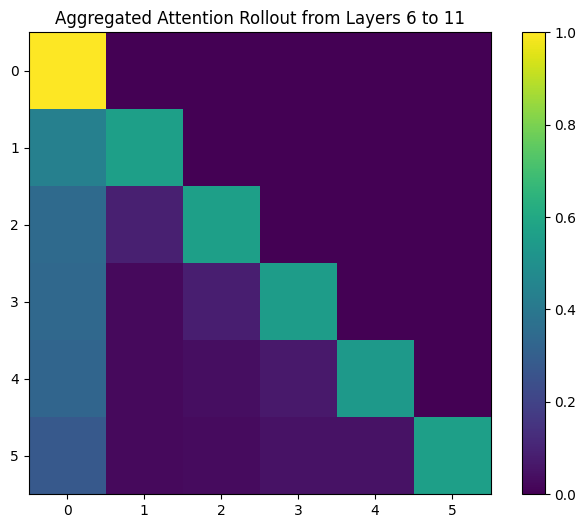

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(rollout, cmap='viridis')
plt.title('Aggregated Attention Rollout from Layers 6 to 11')
plt.colorbar()
plt.savefig('../AggregatedAttentionRollout6_11.png')
plt.show()